# Dynamic Circuits

Allow classical control based on mid-circuit measurements

Use case: Error-mitigation and scalability (according to an IBM paper)

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Check which backends support dynamic circuits
 
service = QiskitRuntimeService()
dc_backends = service.backends(dynamic_circuits=True)
print(dc_backends)

[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>]


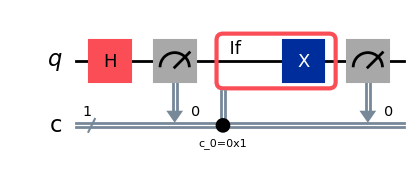

In [2]:
from qiskit.circuit import QuantumCircuit

## Create a simple dynamic circuit!

qc = QuantumCircuit(1, 1)

qc.h(0)

qc.measure(0,0)
with qc.if_test((0, 1)):
    qc.x(0)
qc.measure(0,0)
qc.draw('mpl')

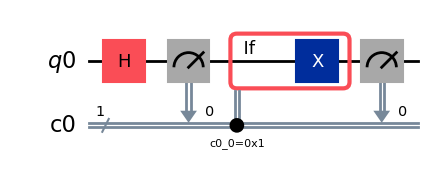

In [3]:
# Useful to do this with registers for more specificity

from qiskit.circuit import QuantumRegister, ClassicalRegister

qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
qc = QuantumCircuit(qubits, clbits)

q0 = qubits[0]
c0 = clbits[0]

qc.h(q0)
qc.measure(q0, c0)
with qc.if_test((c0, 1)):
    qc.x(q0)
qc.measure(q0, c0)
qc.draw('mpl')

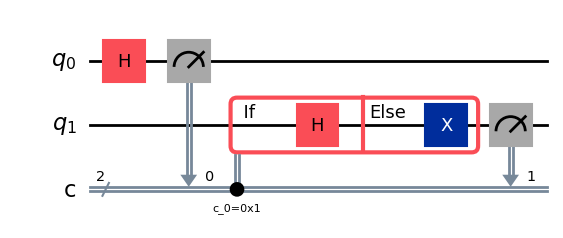

In [4]:
# if-else 

qc = QuantumCircuit(2,2)

qc.h(0)
qc.measure(0, 0)
with qc.if_test((0, 1)) as else_:
    qc.h(1)
with else_:
    qc.x(1)
qc.measure(1,1)

qc.draw('mpl')

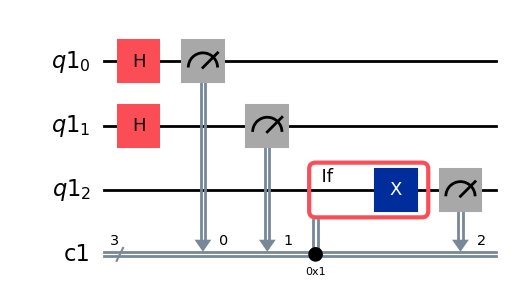

In [5]:
## Multi-qubit conditions

qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
qc = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits

qc.h([q0, q1])
qc.measure(q0, c0)
qc.measure(q1, c1)
with qc.if_test((clbits, 0b001)): #0b means binary!!
    qc.x(q2)
qc.measure(q2, c2)
qc.draw('mpl')

In [6]:
print(0b111)
print(0xA)

7
10


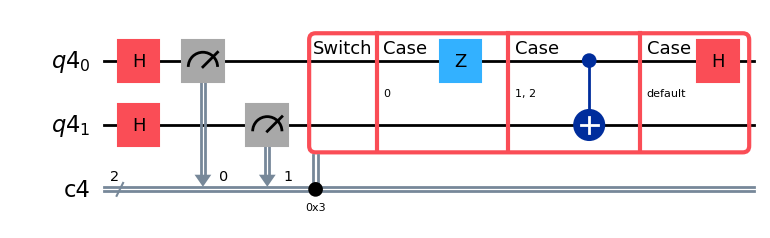

In [9]:
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
qc = QuantumCircuit(qreg, creg)
qc.h([0, 1])
qc.measure([0, 1], [0, 1])

with qc.switch(creg) as case:
    # if '00' is measured, add a Z gate
    with case(0):
        qc.z(0)
    # if '01' or '10' is measured, and a CNOT
    with case(1, 2): #same as 0b01 or 0b10
        qc.cx(0, 1)
    # for any other measurement, add an H gate
    with case(case.DEFAULT):
        qc.h(0)

qc.draw('mpl')